#Difusión espacial

En este taller vamos a trabajar con una implementación en Python del modelo de difusión espacial de [Torsten Hägerstrand](http://en.wikipedia.org/wiki/Torsten_H%C3%A4gerstrand). Este modelo es una simulación tipo [Monte Carlo](http://en.wikipedia.org/wiki/Monte_Carlo_method) del proceso de difusión de innovaciones concebido originalmente por Hagerstrand en 1953.
Para este taller vamos a trabajar con la versión más simple del modelo, las suposiciones básicas son las siguientes:

1. Una sola persona tiene el *mensaje* al principio
2. La innovación es adoptada en cuanto se tiene contacto con ella
3. El mensaje se comunica *unicamente* en encuentros cara a cara
4. El mensaje se transmite en intervalos discretos en los que **todos** los adoptantes transmiten el mensaje a otra persona.
5. El espacio es homogeneo e isotrópico

En escencia, lo que hacemos es considerar al espacio *geográfico* como una retícula en la que cada elemento tiene el mismo número de habitantes. A partir de aquí, la probabilidad de que un habitante de una retícula contacte a otro habitante es función únicamente de la distancia.

La simulación Monte Carlo ocurre en dos etapas, para cada portador del mensaje:

1. Se selecciona al azar (de acuerdo a una función de probabilidad que decae con la distancia) la celda a la cual se transmite el mensaje.
2. Se selecciona otro número al azar para elegir el habitante de la celda que recibe el mensaje. Si este habitante es también portador de la innovación, queda inalterado.

Vamos ahora a jugar un poco con la implementación del modelo de Hagerstrand que está en esta misma carpeta.

In [1]:
%pylab inline
from haggerstrand.diffusion import SimpleDiffusion

Populating the interactive namespace from numpy and matplotlib


En la primera linea importamos todas las librerías que forman el paquete [pylab](http://wiki.scipy.org/PyLab) y le decimos que queremos graficar *inline*, es decir, aquí mismo. La segunda linea importa la *clase* `SimpleDiffusion` que es en donde está implementado el algoritmo.
Para correr el modelo, primero tenemos que *instanciar* la clase:

In [2]:
s = SimpleDiffusion(50,50,9,20,[(20,20)],0.3,15)

Los parámetros para La clase `SimpleDiffusion` son los siguientes (en orden):

1. M: Número de renglones en el espacio
2. N: Número de columnas en el espaci
3. mif_size: Tamaño del MIF
4. pob: Número de habitantes en cada celda
5. initial_diff: Lista de los portadores originales del mensaje
6. p0: Probabilidad de contactar a la celda de origen
7. max_iter: Número de iteraciones a simular

Para ver la lista de parámetros, sus tipos y una descripción, pueden consultar la ayuda:

In [3]:
help(SimpleDiffusion)

Help on class SimpleDiffusion in module haggerstrand.diffusion:

class SimpleDiffusion(__builtin__.object)
 |  Modelo simple de difusión espacial basado en Hägerstrand.
 |  
 |  1.- Espacio homogeneo e isotrópico
 |  2.- Un sólo difusor inicial
 |  3.- ....otras suposiciones...
 |  
 |  :param N: int Número de renglones en el espacio de simulación
 |  :param M: int Número de columnas en el espacio de simulación
 |  :param mif_size: int Tamaño de la matriz (cuadrada) del MIF (debe ser non)
 |  :param pob: int población en cada celda
 |  :param initial_diff: [(int,int)] Lista de coordenadas de los difusores
 |                                   iniciales
 |  :param p0: float Probabilidad de auto-difusión
 |  :param max_iter: int Máximo número de iteraciones
 |  
 |  :attribute space: np.array(M,N,dtype=np.int8) El espacio disponible
 |  :attribute _pop_array: np.array(M*N,pob,dtype=np.bool) array de habitantes
 |                         en cada celda
 |  :attribute _infected_pop: list (sp

Ahora que ya tenemos *instanciada* la clase, podemos correr la simulación:

In [5]:
s.spatial_diffusion()

acabé
Hay 10977 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 15


El algoritmo guarda los resultados para cada iteración en una matriz de `M x N x max_iter`, el resultado final lo podemos ver en la última *rebanada* de la matriz:

In [6]:
s.result[:,:,s.max_iter-1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

Fíjense en la notación: `s.result[:,:,s.max_iter-1]` le está pidiendo al *array* `s.result` que le dé los dos primeros índices completos y la entrada `s.max_iter-1` del último índice. (Noten que el último índice está en `max_iter-1` porque los *arrays* empiezan en cero)

Habrán notado que usamos la notación `s.algo` para *hablar* con el objeto `s`, esta es la manera de hablar con las *propiedades* de los objetos en Python. La lista de propiedades de `SimpleDiffusion` las encuentran en la sección *attributes* de la ayuda.

Claro que ver los números de la matriz de resultado no es la mejor manera de visualizarlos, hagamos una gráfica:

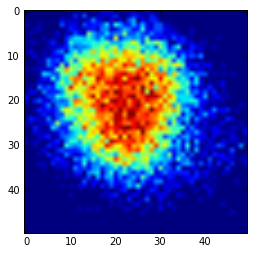

In [7]:
plt.imshow(s.result[:,:,s.max_iter-1])

Como las matrices se pueden interpretar directamente como imágenes, llamamos al *método* imshow de matplotlib para graficarla.

### Ejercicio rápido
Visualicen diferentes cortes temporales de la matriz de resultados

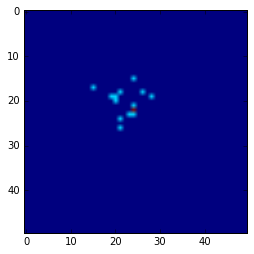

In [8]:
plt.imshow(s.result[:,:,3])

Para entender el proceso de difusión espacial, conviene compararlo con un proceso que suceda aleatoriamente, para eso `SimpleDiffusion` tiene el método random_diffusion:

In [9]:
s.random_diffusion()

acabé
Hay 21600 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 15


Esto reescribió la matriz de resultados y la populó con una difusión aleatoria. Veamos el resultado final:

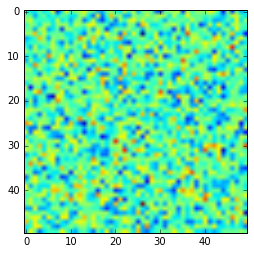

In [10]:
plt.imshow(s.result[:,:,14])

Como reescribimos la matriz de resultados, necesitamos guardar el resultado y volver a correr el algoritmo para comparar ambos casos:

In [11]:
random_diff = np.copy(s.result)
s.spatial_diffusion()

acabé
Hay 10218 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 15


Ahora sí podemos ver el resultado final en ambos casos:

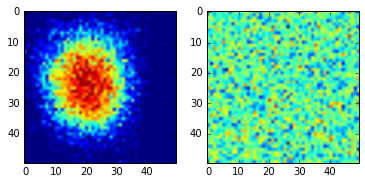

In [12]:
subplot(1,2,1)
plt.imshow(s.result[:,:,s.max_iter-1])
subplot(1,2,2)
plt.imshow(random_diff[:,:,s.max_iter-1])

Aquí utilizamos la funcionalidad `subplot` que nos permite arreglar la distribución de varias gráficas. Por ejemplo, `subplot(1,2,1)` quiere decir que vamos a dibujar en 1 renglón y dos columnas y que lo que sigue es la primera gráfica.

### Ejercicio rápido: 
Comparen varios tiempos de los algoritmos

## Evolución temporal
Como vimos, los resultados son muy diferentes para la disusión espacial y la difusión aleatoria, vamos a ver ahora cómo se comporta la evolución temporal. Para esto, la clase `SimpleDiffussion` nos provee la varable `time_series` que es un lista con la cantidad de nuevos adoptantes en cada iteración:

In [13]:
s.time_series

[1, 2, 4, 7, 15, 30, 57, 112, 212, 393, 692, 1176, 1801, 2566, 3149]

Claro que la podemos graficar:

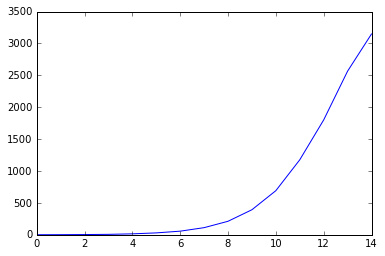

In [14]:
plt.plot(s.time_series)

Como podemos ver, el crecimiento parece ser exponencial (piensen por qué), pero ¿Qué pasa si aumentamos el número de iteraciones?

acabé
Hay 32459 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 20


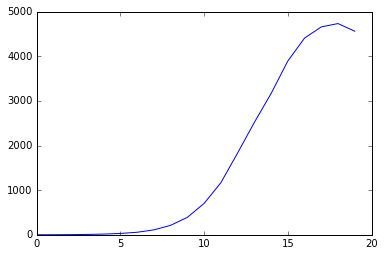

In [15]:
s = SimpleDiffusion(50,50,9,20,[(20,20)],0.3,20)
s.spatial_diffusion()
plt.plot(s.time_series)

El número de adoptantes deja de crecer ¿Por qué?
### Ejercicio
¿Ocurrirá el mismo comportamiento en el caso de la difusión aleatoria?

## Animación
Para cerrar esta parte del taller, vamos a ver unas animaciones de los procesos de difusión:

acabé
Hay 20566 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 18



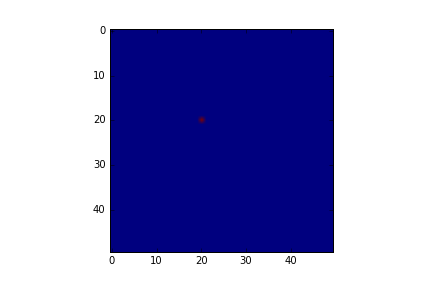
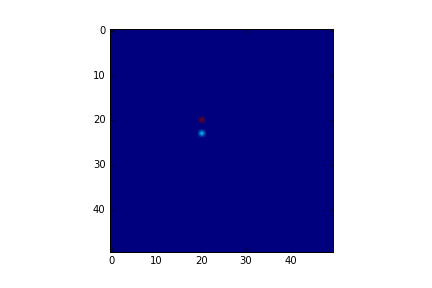
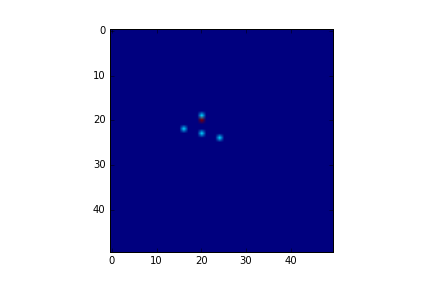
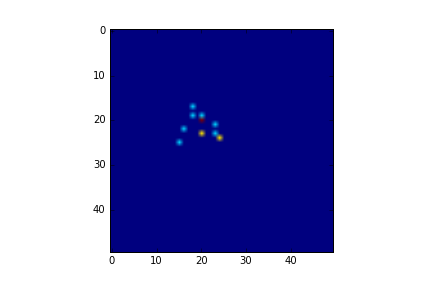
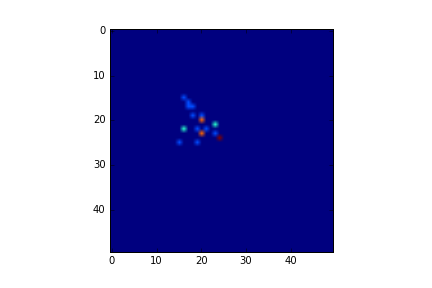
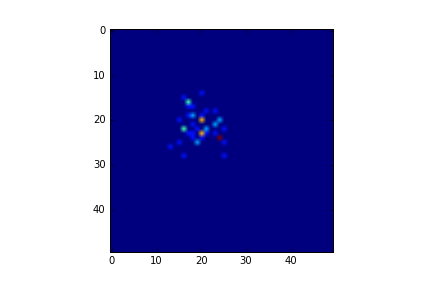
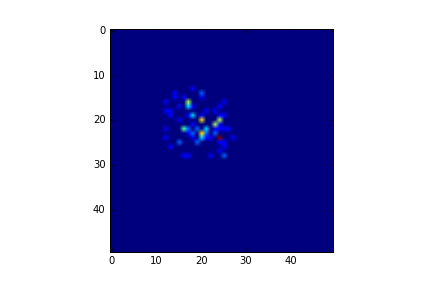
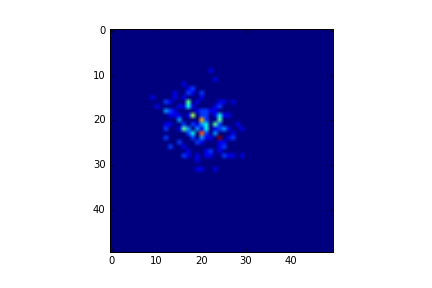
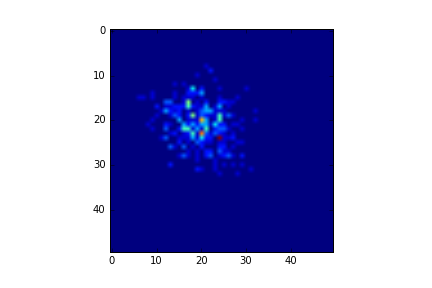
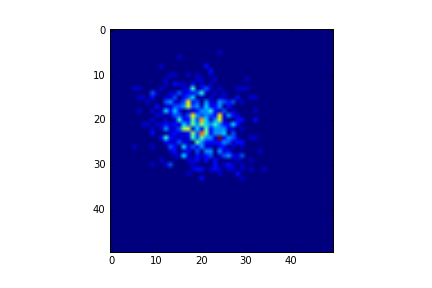
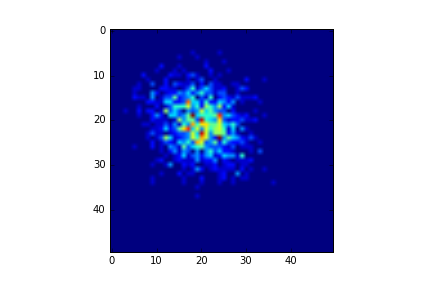
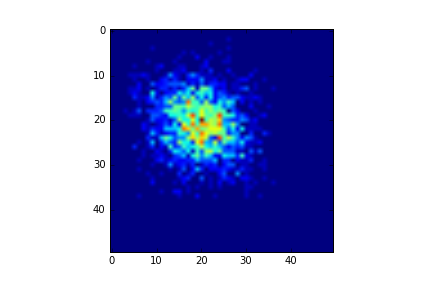
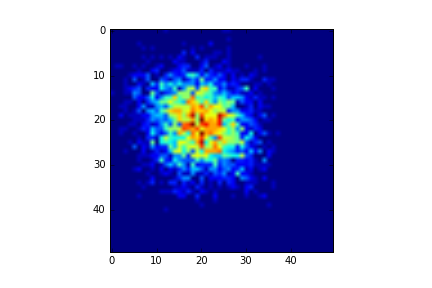
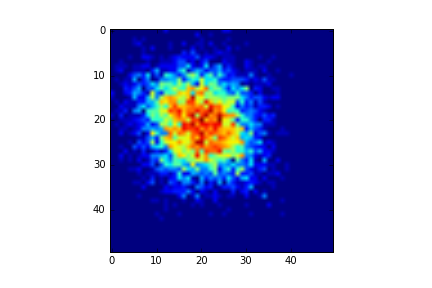
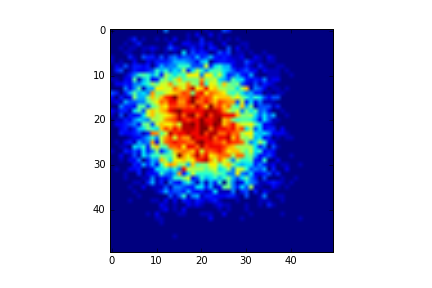
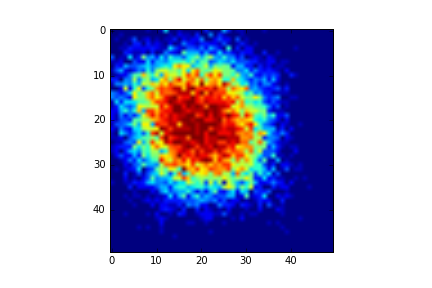
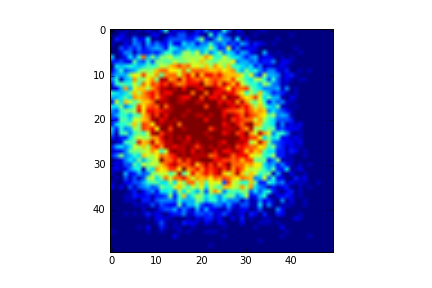
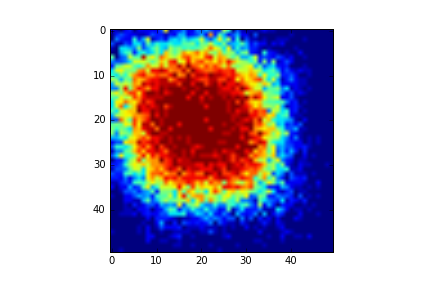

In [17]:
from JSAnimation import IPython_display
import matplotlib.animation as animation
s = SimpleDiffusion(50,50,9,20,[(20,20)],0.3,18)
s.spatial_diffusion()
ims = []
fig = plt.figure()
for i in range(0,s.max_iter):
    im = imshow(s.result[:,:,i])
    ims.append([im])

animation.ArtistAnimation(fig, ims, interval=100, blit=True)

El código para crear la animación parece complicado pero, si se fijan con atención, en realidad es bastante directo: creamos una lista vacía para guardar cada imagen (`ims = []`) y luego la vamos llenando adentro de un *ciclo de control*, al final llamamos a la librería `matplotlib.animation` para que se encargue de hacer la animación con las imágenes que ya construimos (la linea `from JSAnimation import IPython_display` sólo sirve para desplegar la animación en ésta interfaz, normalmente no es necesaria).

###Ejercicio
Hagan una animación para el caso de difusión aleatoria